<a href="https://colab.research.google.com/github/sanaa-04/ML-Project/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [ ]:
df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5,I've heard bad things about this 64gb Micro SD...,01-02-2014,310,0,0,0,0,0.0,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.sort_values('wilson_lower_bound', ascending=False)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109
...,...,...,...,...,...,...,...,...,...,...,...
1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000
1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000
1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000
1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000


In [ ]:
df.shape

(4915, 11)

In [ ]:
df.dtypes

,0
reviewerName,object
overall,int64
reviewText,object
reviewTime,object
day_diff,int64
helpful_yes,int64
helpful_no,int64
total_vote,int64
score_pos_neg_diff,int64
score_average_rating,float64


In [ ]:
df.isnull().sum()

,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0
score_average_rating,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [ ]:
def missing_value_analysis(df):
  na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
  n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
  ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
  missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
  missing_df = pd.DataFrame(missing_df)
  return missing_df

def check_df(df, head=5, tail = 5):

  print('SHAPE'.center(82,'~'))
  print('Rows: {}'.format(df.shape[0]))
  print('Columns: {}'.format(df.shape[1]))
  print('TYPES'.center(82,'~'))
  print(df.dtypes)
  print(''.center(82,'~'))
  print(missing_value_analysis(df))
  print('DUPLICATED VALUES'.center(83,'~'))
  print(df.duplicated().sum())


check_df(df)



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Total Missing Values  Ratio
reviewerName                     1   0.02
reviewText                       1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0


In [ ]:
df.nunique().sort_values(ascending=False)

,0
reviewText,4912
reviewerName,4594
reviewTime,690
day_diff,690
wilson_lower_bound,40
score_average_rating,28
score_pos_neg_diff,27
total_vote,26
helpful_yes,23
helpful_no,17


In [ ]:
# prompt: write a code for a function that will take a column and will give a whole summary about the column like %, etc. And will also visualize them  using countplot and pieplot

import pandas as pd
import matplotlib.pyplot as plt
def column_summary(df, column_name):
  """
  This function takes a dataframe and a column name as input, and provides a summary of the column,
  including descriptive statistics, visualizations, and value counts.

  Args:
      df (pd.DataFrame): The input dataframe.
      column_name (str): The name of the column to analyze.
  """

  print(f"Summary for column: {column_name}")
  print("-" * 50)

  # Descriptive statistics
  print("Descriptive Statistics:")
  print(df[column_name].describe())
  print("\n")

  # Value counts and percentage
  value_counts = df[column_name].value_counts()
  percentage_counts = (value_counts / len(df)) * 100
  print("Value Counts and Percentages:")
  print(pd.concat([value_counts, percentage_counts], axis=1, keys=['Count', 'Percentage']))
  print("\n")

  # Visualizations
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  sns.countplot(x=column_name, data=df)
  plt.title(f"Countplot for {column_name}")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

  plt.subplot(1, 2, 2)
  df[column_name].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(f"Pie Chart for {column_name}")

  plt.tight_layout()  # Adjust layout to prevent overlapping
  plt.show()

# Example usage:
#column_summary(df, 'rating')


Summary for column: overall
--------------------------------------------------
Descriptive Statistics:
count    4915.000000
mean        4.587589
std         0.996845
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64


Value Counts and Percentages:
         Count  Percentage
overall                   
5         3922   79.796541
4          527   10.722279
1          244    4.964395
3          142    2.889115
2           80    1.627670




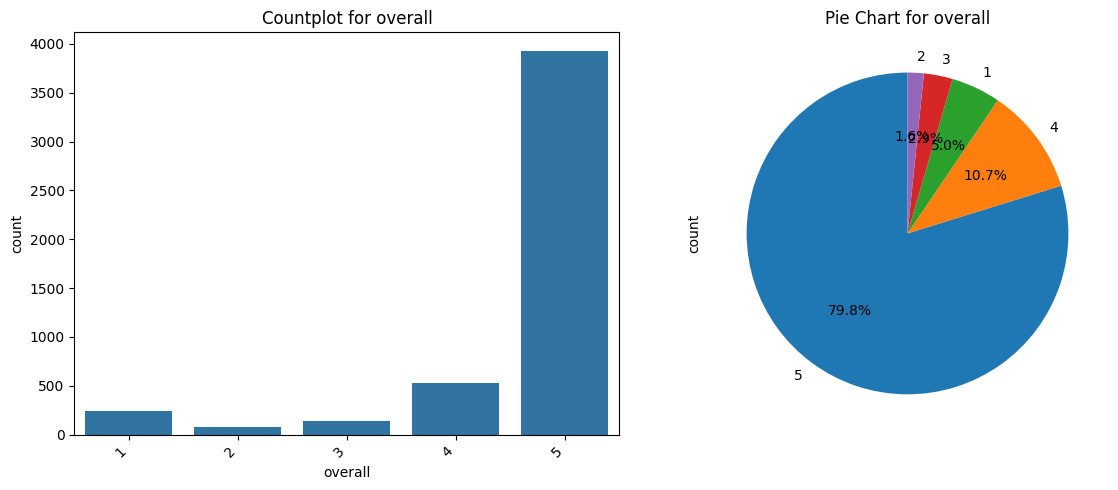

In [ ]:
column_summary(df, 'overall')


In [ ]:
df.reviewText.head()

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."


In [ ]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [ ]:
# prompt: write a code for removing all the punctuation and numbers from the review_example

review_example = re.sub("[^a-zA-Z]", " ", review_example)
review_example


'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

In [ ]:
# prompt: write a code that lower the review_example amd also split them

review_example = review_example.lower().split()
print(review_example)


['update', 'so', 'my', 'lovely', 'wife', 'bought', 'me', 'a', 'samsung', 'galaxy', 'tab', 'for', 'father', 's', 'day', 'and', 'i', 've', 'been', 'loving', 'it', 'ever', 'since', 'just', 'as', 'other', 'with', 'samsung', 'products', 'the', 'galaxy', 'tab', 'has', 'the', 'ability', 'to', 'add', 'a', 'microsd', 'card', 'to', 'expand', 'the', 'memory', 'on', 'the', 'device', 'since', 'it', 's', 'been', 'over', 'a', 'year', 'i', 'decided', 'to', 'do', 'some', 'more', 'research', 'to', 'see', 'if', 'sandisk', 'offered', 'anything', 'new', 'as', 'of', 'their', 'product', 'lineup', 'for', 'microsd', 'cards', 'from', 'worst', 'to', 'best', 'performance', 'wise', 'are', 'the', 'as', 'follows', 'sandisksandisk', 'ultrasandisk', 'ultra', 'plussandisk', 'extremesandisk', 'extreme', 'plussandisk', 'extreme', 'pronow', 'the', 'difference', 'between', 'all', 'of', 'these', 'cards', 'are', 'simply', 'the', 'speed', 'in', 'which', 'you', 'can', 'read', 'write', 'data', 'to', 'the', 'card', 'yes', 'the',

In [ ]:
# prompt: writa a code that will remove all the numbers and punctuation from reviewText column and also lower the column in df

df['reviewText'] = df['reviewText'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,no issues,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,5,purchased this for my device it worked as adve...,25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected i should have sprung for ...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,this think has worked out greathad a diff bran...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,bought it with retail packaging arrived legit ...,13-07-2013,513,0,0,0,0,0.0,0.0


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df['reviewText'] = df['reviewText'].astype(str)
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].items():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"


In [ ]:
df[df['sentiment']=='Positive'].sort_values("wilson_lower_bound",ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife bought me a samsun...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.156702,0.558574,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and microsdhc car...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.091564,0.514756,Positive
4212,SkincareCEO,1,note please read the last update scroll to th...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.208325,0.505531,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it ...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.145833,0.470566,Positive
4672,Twister,5,sandisk announcement of the first gb micro sd ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.161228,0.493237,Positive


Summary for column: sentiment
--------------------------------------------------
Descriptive Statistics:
count         4915
unique           3
top       Positive
freq          3969
Name: sentiment, dtype: object


Value Counts and Percentages:
           Count  Percentage
sentiment                   
Positive    3969   80.752798
Negative     659   13.407935
Neutral      287    5.839268




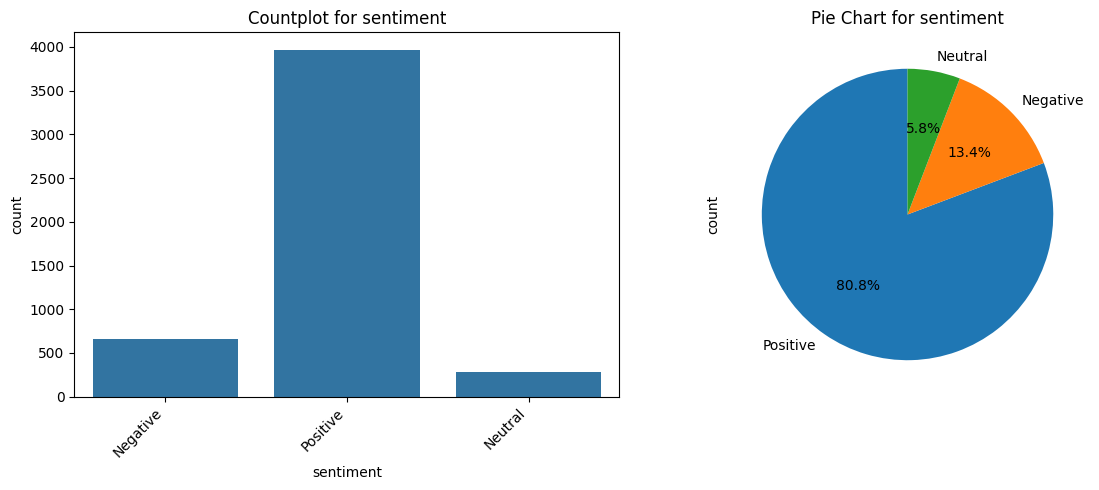

In [ ]:
column_summary(df,'sentiment')